A Notebook for processing experimental results.

All runs correspond to a folder in `outputs/` from which we can load config information and results from json data.

In [ ]:
#outputs_folder = 'outputs'
#outputs_folder = 'outputs-llama3.1-8b'
#outputs_folder = 'outputs-llama3.1-8b-instruct'
outputs_folder = 'outputs-llama3.1-8b.negative'
#output_foloder = 'outputs- outputs-qwen2.5-7b'

In [102]:
import json
from pathlib import Path
import pandas as pd

In [103]:
# Set this to filter runs based on the cfg.experiment_name argument
experiment_name = None

# It can be a list like this:
# experiment_name = ["pythia-small", "pythia-big"]

In [104]:
def load_experiment_data(experiment_name=None, base_folder="outputs"):
    """
    Load experiment data from JSON files and return a processed DataFrame.
    
    Args:
        experiment_name (str or list, optional): Name(s) of experiment(s) to filter for.
                                               If None, loads all experiments.
        base_folder (str, optional): Base path containing experiment outputs.
                                   Defaults to "outputs".
    
    Returns:
        pandas.DataFrame: Processed DataFrame containing experiment results
    """
    from pathlib import Path
    import json
    import pandas as pd
    
    folder_path = Path(base_folder)
    json_list = []
    
    # Convert single experiment name to list for consistent processing
    if isinstance(experiment_name, str):
        experiment_name = [experiment_name]
    
    # Iterate through all JSON files in subdirectories
    for json_file in folder_path.glob("*/*.json"):
        with open(json_file, "r", encoding="utf-8") as f:
            try:
                # Load the JSON content
                json_content = json.load(f)
                
                # Filter by experiment name if specified
                if experiment_name is not None:
                    if ("cfg_experiment_name" in json_content and 
                        json_content["cfg_experiment_name"] in experiment_name):
                        json_list.append(json_content)
                else:
                    json_list.append(json_content)
            except json.JSONDecodeError:
                print(f"Warning: Could not parse JSON file: {json_file}")
                continue
    
    if not json_list:
        raise ValueError(f"No data found for experiment(s): {experiment_name}")
    
    # Sort by time, increasing
    json_list = sorted(json_list, key=lambda x: x["time"])
    
    # Convert to DataFrame
    df = pd.DataFrame(json_list)
    
    # Add derived columns
    df["ratio"] = df["target_length"] / df["num_free_tokens"]
    df["memorized"] = df["ratio"] > 1
    df.loc[df["success"] == False, "memorized"] = False
    
    # Sort by multiple columns
    df = df.sort_values(by=["cfg_model_name", "cfg_dataset", 
                           "cfg_data_idx", "cfg_discrete_optimizer"])
    
    df.head().round(2)
    return df

In [105]:
df = load_experiment_data(experiment_name=experiment_name, base_folder=outputs_folder)
# print the full dataframe (without ... truncation)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df


,target_length,target_str,loss_of_target_str,loss_of_prompt,success,optimal_prompt,free_token_slice,input_slice,target_slice,loss_slice,num_free_tokens,input_ids,cfg_batch_size,cfg_chat_template,cfg_use_binary_search,cfg_data_idx,cfg_dataset,cfg_discrete_optimizer,cfg_experiment_name,cfg_input_str,cfg_lr,cfg_max_tokens,cfg_mini_batch_size,cfg_model_name,cfg_num_steps,cfg_optimizer,cfg_random_weights,cfg_run_id,cfg_seed,cfg_system_prompt,cfg_target_str,cfg_topk,time,ratio,memorized
10,32,"Mr. and Mrs. Dursley, of number four, Privet D...",2.998260,12.545473,True,(unittestOLLOW edible धन非常 अक この Hello आपकงแต�...,"[0, 84]","[0, 84]","[84, 116]","[83, 115]",84.0,"[38278, 31289, 67740, 115443, 108008, 106930, ...",100,"[, ]",True,0,obliviate-hp,gcg,/datadrive2/unmemorize/experiments/4/standard/...,,0.01,-1,100,/datadrive2/unmemorize/experiments/4/standard/...,200,adam,False,legal-Kaytie,42,,"Mr. and Mrs. Dursley, of number four, Privet D...",250,20250216-05:46:54,0.380952,False
11,27,They were the last people you'd expect to be i...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,"[, ]",True,1,obliviate-hp,gcg,/datadrive2/unmemorize/experiments/4/standard/...,,0.01,-1,100,/datadrive2/unmemorize/experiments/4/standard/...,200,adam,False,these-Dorrell,42,,They were the last people you'd expect to be i...,250,20250216-07:02:03,NaN,False
12,20,Mr. Dursley was the director of a firm called ...,3.936526,13.570731,True,"[](hari=""$ammed durseipector()\r\nTitle Mens d...","[0, 43]","[0, 43]","[43, 63]","[42, 62]",43.0,"[52094, 77007, 20840, 25831, 10878, 73868, 195...",100,"[, ]",True,2,obliviate-hp,gcg,/datadrive2/unmemorize/experiments/4/standard/...,,0.01,-1,100,/datadrive2/unmemorize/experiments/4/standard/...,200,adam,False,negative-Cinnamon,42,,Mr. Dursley was the director of a firm called ...,250,20250216-08:01:35,0.465116,False
13,23,"He was a big, beefy man with hardly any neck, ...",3.196506,12.718294,True,"aaaaaaaa**:741 Vegetable fighting294-ranging,*...","[0, 48]","[0, 48]","[48, 71]","[47, 70]",48.0,"[70540, 96618, 25021, 95392, 11039, 17168, 821...",100,"[, ]",True,3,obliviate-hp,gcg,/datadrive2/unmemorize/experiments/4/standard/...,,0.01,-1,100,/datadrive2/unmemorize/experiments/4/standard/...,200,adam,False,easy-Cicily,42,,"He was a big, beefy man with hardly any neck, ...",250,20250216-09:37:24,0.479167,False
5,32,"Mr. and Mrs. Dursley, of number four, Privet D...",1.624032,13.053508,True,"hen Mary.\"" obliged an電視 سازمان(()ุย Rowe gir...","[0, 65]","[0, 65]","[65, 97]","[64, 96]",65.0,"[48916, 10455, 87965, 54117, 459, 120008, 1060...",100,"[, ]",True,0,obliviate-hp,gcg,/datadrive2/unmemorize/experiments/4/standard/...,,0.01,-1,100,/datadrive2/unmemorize/experiments/4/standard/...,200,adam,False,testy-Kellen,42,,"Mr. and Mrs. Dursley, of number four, Privet D...",250,20250215-01:30:41,0.492308,False
6,27,They were the last people you'd expect to be i...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,"[, ]",True,1,obliviate-hp,gcg,/datadrive2/unmemorize/experiments/4/standard/...,,0.01,-1,100,/datadrive2/unmemorize/experiments/4/standard/...,200,adam,False,positive-Ana,42,,They were the last people you'd expect to be i...,250,20250215-02:00:14,NaN,False
7,20,Mr. Dursley was the director of a firm called ...,2.489509,13.036896,True,"throws reins multiplicationnip('*',ابقات Alic...","[0, 24]","[0, 24]","[24, 44]","[23, 43]",24.0,"[3872, 90518, 47544, 70873, 85659, 127775, 800...",100,"[, ]",True,2,obliviate-hp,gcg,/datadrive2/unmemorize/experiments/4/standard/...,,0.01,-1,100,/datadrive2/unmemorize/experiments/4/standard/...,200,adam,False,basic-Kiala,42,,Mr. Dursley was the director of a firm called ...,250,20250215-02:18:50,0.833333,False
8,23,"He was a big, beefy man with hardly any neck, ...",NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,"[, ]",True,3,obliviate-hp,gcg,/datadrive2/unmemorize/experiments/4/standard/...,,0.01,-1,100,/datadrive2/unmemorize/experiments/4/standard/...,200,adam,False,thorough-Haroon,42,,"He was a

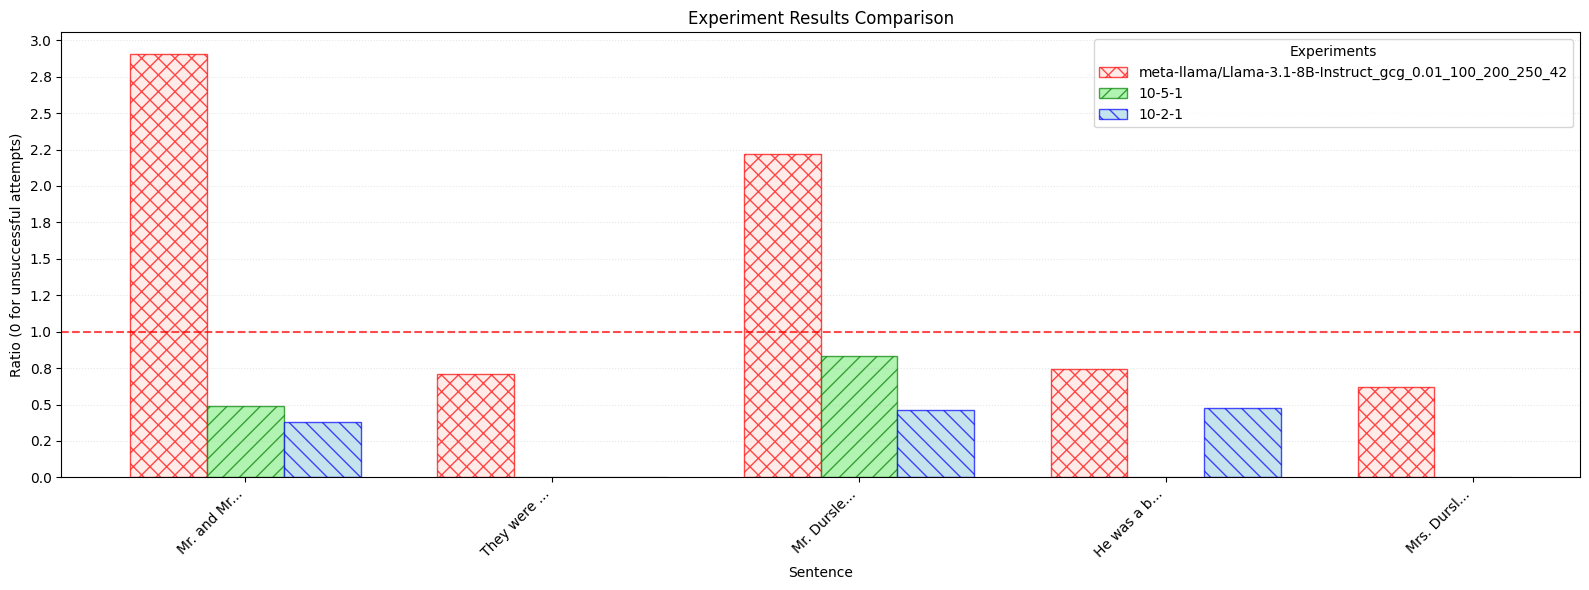

In [106]:
def plot_experiment_results(df):
    """
    Plot ratio values as narrow hatched bars for multiple experiments with reduced spacing.
    Special handling for 10-5-1 (green) and 10-2-1 (blue) experiments.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Get unique experiments
    experiments = df['cfg_experiment_name'].unique()
    
    # Sort experiments to ensure 10-5-1 and 10-2-1 are at the end
    def sort_key(exp):
        if "10-5-1" in exp:
            return 2
        elif "10-2-1" in exp:
            return 3
        return 1
    
    experiments = sorted(experiments, key=sort_key)
    n_experiments = len(experiments)
    
    # Define base styles for other experiments
    base_styles = [
        {'hatch': 'xx', 'edge': 'red', 'face': 'mistyrose'},
        {'hatch': '++', 'edge': 'purple', 'face': 'lavender'},
        {'hatch': '--', 'edge': 'orange', 'face': 'bisque'}
    ]
    
    # Create style mapping
    styles = {}
    base_idx = 0
    
    for exp in experiments:
        if "10-5-1" in exp:
            styles[exp] = {'hatch': '//', 'edge': 'green', 'face': 'lightgreen'}
        elif "10-2-1" in exp:
            styles[exp] = {'hatch': '\\\\', 'edge': 'blue', 'face': 'lightblue'}
        else:
            styles[exp] = base_styles[base_idx % len(base_styles)]
            base_idx += 1
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(16, 6))
    
    # Width settings
    bar_width = 0.01
    group_spacing = 0.04
    
    # Legend handles
    legend_handles = []
    
    # Find max points and collect target strings
    max_points = 0
    all_target_strs = []
    
    for experiment in experiments:
        exp_df = df[df['cfg_experiment_name'] == experiment].sort_values('time')
        max_points = max(max_points, len(exp_df))
        all_target_strs.extend(exp_df['target_str'].tolist())
    
    # Create labels
    unique_targets = pd.unique(all_target_strs)
    labels = [str(s)[:10] + "..." for s in unique_targets]
    
    # Plot each experiment
    for i, experiment in enumerate(experiments):
        exp_df = df[df['cfg_experiment_name'] == experiment].sort_values('time')
        ratios = [row.ratio if row.success else 0 for _, row in exp_df.iterrows()]
        
        # Calculate positions
        x = np.arange(len(ratios)) * group_spacing
        offset = (i - n_experiments/2 + 0.5) * bar_width
        x_positions = x + offset
        
        # Get style for this experiment
        style = styles[experiment]
        
        # Create label based on experiment name
        if "10-5-1" in experiment or "10-2-1" in experiment:
            label = "10-5-1" if "10-5-1" in experiment else "10-2-1"
        else:
            label = experiment
        
        bars = ax.bar(x_positions, ratios,
                     width=bar_width,
                     hatch=style['hatch'],
                     alpha=0.7,
                     edgecolor=style['edge'],
                     color=style['face'],
                     label=label)
        
        for j, (ratio, success) in enumerate(zip(ratios, exp_df['success'])):
            if not success:
                bars[j].set_facecolor('lightgray')
                bars[j].set_edgecolor('gray')
        
        legend_handles.append(bars[0])
    
    # Add horizontal line at 1.0
    ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.7)
    
    # Set y-axis ticks
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
    
    # Customize plot
    ax.set_title("Experiment Results Comparison", fontsize=12)
    ax.set_xlabel('Sentence', fontsize=10)
    ax.set_ylabel('Ratio (0 for unsuccessful attempts)', fontsize=10)
    
    # Add legend
    ax.legend(title="Experiments")
    
    # Set x-axis labels
    plt.xticks(np.arange(max_points) * group_spacing, labels[:max_points], rotation=45, ha='right')
    
    # Add grid
    ax.grid(True, axis='y', linestyle=':', alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

plt = plot_experiment_results(df)
plt.show()

# save to outputs folder
plt.savefig(f"{outputs_folder}/experiment_results.png")

In [107]:
# Filter the rows where dataset is 'random', the model is 'EleutherAI/pythia-14m', and success is True
filtered_df = df[(df['cfg_dataset'] == 'famous_quotes') &
                 (df['cfg_model_name'] == 'EleutherAI/pythia-14m')
                 ]
filtered_df.head().round(2)

,target_length,target_str,loss_of_target_str,loss_of_prompt,success,optimal_prompt,free_token_slice,input_slice,target_slice,loss_slice,num_free_tokens,input_ids,cfg_batch_size,cfg_chat_template,cfg_use_binary_search,cfg_data_idx,cfg_dataset,cfg_discrete_optimizer,cfg_experiment_name,cfg_input_str,cfg_lr,cfg_max_tokens,cfg_mini_batch_size,cfg_model_name,cfg_num_steps,cfg_optimizer,cfg_random_weights,cfg_run_id,cfg_seed,cfg_system_prompt,cfg_target_str,cfg_topk,time,ratio,memorized


In [108]:
# Sort and dedup
df_sorted = df.sort_values(by=['cfg_model_name', 'cfg_discrete_optimizer', 'cfg_dataset', 'cfg_data_idx', 'success'], ascending=[True, True, True, True, False])
df = df_sorted.drop_duplicates(subset=['cfg_dataset', 'cfg_data_idx', 'cfg_model_name', 'cfg_discrete_optimizer'], keep='first')
df = df[df["success"] == True]

# Make summary counting the average ratio and success rate for each dataset and discrete_optimizer include counts
summary = df.groupby(["cfg_model_name", "cfg_dataset", "cfg_discrete_optimizer"]).agg(
    {"ratio": "mean", "memorized": "mean", "success": "count"}).round(2)
summary

,,,ratio,memorized,success
cfg_model_name,cfg_dataset,cfg_discrete_optimizer,,,
/datadrive2/unmemorize/experiments/4/standard/pretrain/llama3.1-8b-instruct/10/10-2-1/0,obliviate-hp,gcg,0.44,0.0,3
/datadrive2/unmemorize/experiments/4/standard/pretrain/llama3.1-8b-instruct/10/10-5-1/0,obliviate-hp,gcg,0.66,0.0,2
meta-llama/Llama-3.1-8B-Instruct,obliviate-hp,gcg,1.44,0.4,5
